In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head(10)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [114]:
# datatypes of columns
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [115]:
# Check missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Data Cleaning

In [116]:
df.drop_duplicates(subset = ['App', 'Category', 'Genres','Last Updated'],inplace = True)

In [117]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [118]:
df = df[df['Installs'] != 'Free']
df['Installs'] = df['Installs'].str.replace('[+,]', '').astype(int)

In [119]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [120]:
df['Size'] = [float(size[:-1])/1024 if size.endswith('k') else float(size[:-1]) if size.endswith('M') else np.nan for size in df['Size']]
df.rename(columns = {'Size' : 'Size (M)'}, inplace = True)

In [121]:
df['Reviews'] = df['Reviews'].astype(int)

In [122]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [123]:
df = df.where(df['Content Rating'] != 'Unrated', np.nan)

In [124]:
df['Price'] = df['Price'].str.replace('$','').astype(float)

In [125]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [126]:
df['Android Ver'] = df['Android Ver'].str.replace('[a-z A-Z]','').replace('',np.nan)
df.rename(columns = {'Android Ver' : 'Min Android Ver'}, inplace = True)

In [127]:
# Some statistics
df.describe()

,Rating,Reviews,Size (M),Installs,Price
count,8312.000000,9.776000e+03,8510.000000,9.776000e+03,9776.000000
mean,4.175818,2.444961e+05,20.532182,8.568105e+06,1.087163
std,0.534026,1.943706e+06,21.934778,5.745815e+07,16.751513
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,2.600000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,1.042000e+03,12.000000,1.000000e+05,0.000000
75%,4.500000,3.163200e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### Most popular category

In [128]:
df[df['Installs'] == df['Installs'].max()].groupby('Category').agg(count = ('Category', 'count')).sort_values('count', ascending = False).index.tolist()[0]

'COMMUNICATION'

### App with the largest size

In [129]:
print(df['Size (M)'].max())
df[df['Size (M)'] == df['Size (M)'].max()]['App'].tolist()

100.0


['Post Bank',
 'Talking Babsy Baby: Baby Games',
 'Hungry Shark Evolution',
 'Mini Golf King - Multiplayer Game',
 'Navi Radiography Pro',
 'Vi Trainer',
 'Ultimate Tennis',
 'The Walking Dead: Our World',
 'Miami crime simulator',
 'Gangster Town: Vice District',
 'SimCity BuildIt',
 'Car Crash III Beam DH Real Damage Simulator 2018',
 'Draft Simulator for FUT 18',
 'Stickman Legends: Shadow Wars']

### What percentage of apps is Free

In [130]:
np.mean(df['Type'] == 'Free')

0.9221722233585601

### App with the largest num of installs

In [131]:
df['Installs'].max()

1000000000.0

In [132]:
df[df['Installs'] == df['Installs'].max()]['App'].tolist()

['Google Play Books',
 'Messenger – Text and Video Chat for Free',
 'WhatsApp Messenger',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Hangouts',
 'Skype - free IM & video calls',
 'Google Play Games',
 'Subway Surfers',
 'Facebook',
 'Instagram',
 'Google+',
 'Google Photos',
 'Maps - Navigate & Explore',
 'Google Street View',
 'Google',
 'Google Drive',
 'YouTube',
 'Google Play Movies & TV',
 'Google News',
 'Google Drive',
 'Google Photos',
 'Google Play Games']

### For the years 2016 what are the category of apps that have got the most downloads

In [133]:
df['Last Updated Year'] = df['Last Updated'].dt.year

In [134]:
max_install_2016 = df[df['Last Updated Year'] == 2016]['Installs'].max()
max_install_2016

100000000.0

In [135]:
df[(df['Last Updated Year'] == 2016) & (df['Installs'] == max_install_2016)]['Category'].tolist()

['TOOLS', 'VIDEO_PLAYERS', 'GAME']

### What are the total number of applications in each categories?

In [136]:
df.groupby('Category').agg(count = ('Category', 'count')).sort_values('count', ascending = False)
# or
# df['Category'].value_counts()

,count
Category,
FAMILY,1910
GAME,963
TOOLS,830
BUSINESS,421
MEDICAL,400
PERSONALIZATION,376
PRODUCTIVITY,376
LIFESTYLE,369
FINANCE,346


### What is the average rating of the applications in each categories?

In [137]:
df.groupby('Category').agg(avg_rating = ('Rating', 'mean'))

,avg_rating
Category,
ART_AND_DESIGN,4.357377
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.344970
BUSINESS,4.098106
COMICS,4.181481
COMMUNICATION,4.121401
DATING,3.970149
EDUCATION,4.364407


### What is the average price of applications in each categories?

In [138]:
df.groupby('Category').agg(avg_price = ('Price', 'mean'))

,avg_price
Category,
ART_AND_DESIGN,0.093281
AUTO_AND_VEHICLES,0.158471
BEAUTY,0.000000
BOOKS_AND_REFERENCE,0.539505
BUSINESS,0.416366
COMICS,0.000000
COMMUNICATION,0.263101
DATING,0.160468
EDUCATION,0.150924


### What is the revenue for each app?

In [139]:
df['Revenue'] = df['Price']*df['Installs']

In [140]:
df.head()

,App,Category,Rating,Reviews,Size (M),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Min Android Ver,Last Updated Year,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018.0,0.0


### What are the applications with most revenue?

In [141]:
df[df['Revenue'] == df['Revenue'].max()]

,App,Category,Rating,Reviews,Size (M),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Min Android Ver,Last Updated Year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,NaN,2018.0,69900000.0


# Data Visualization

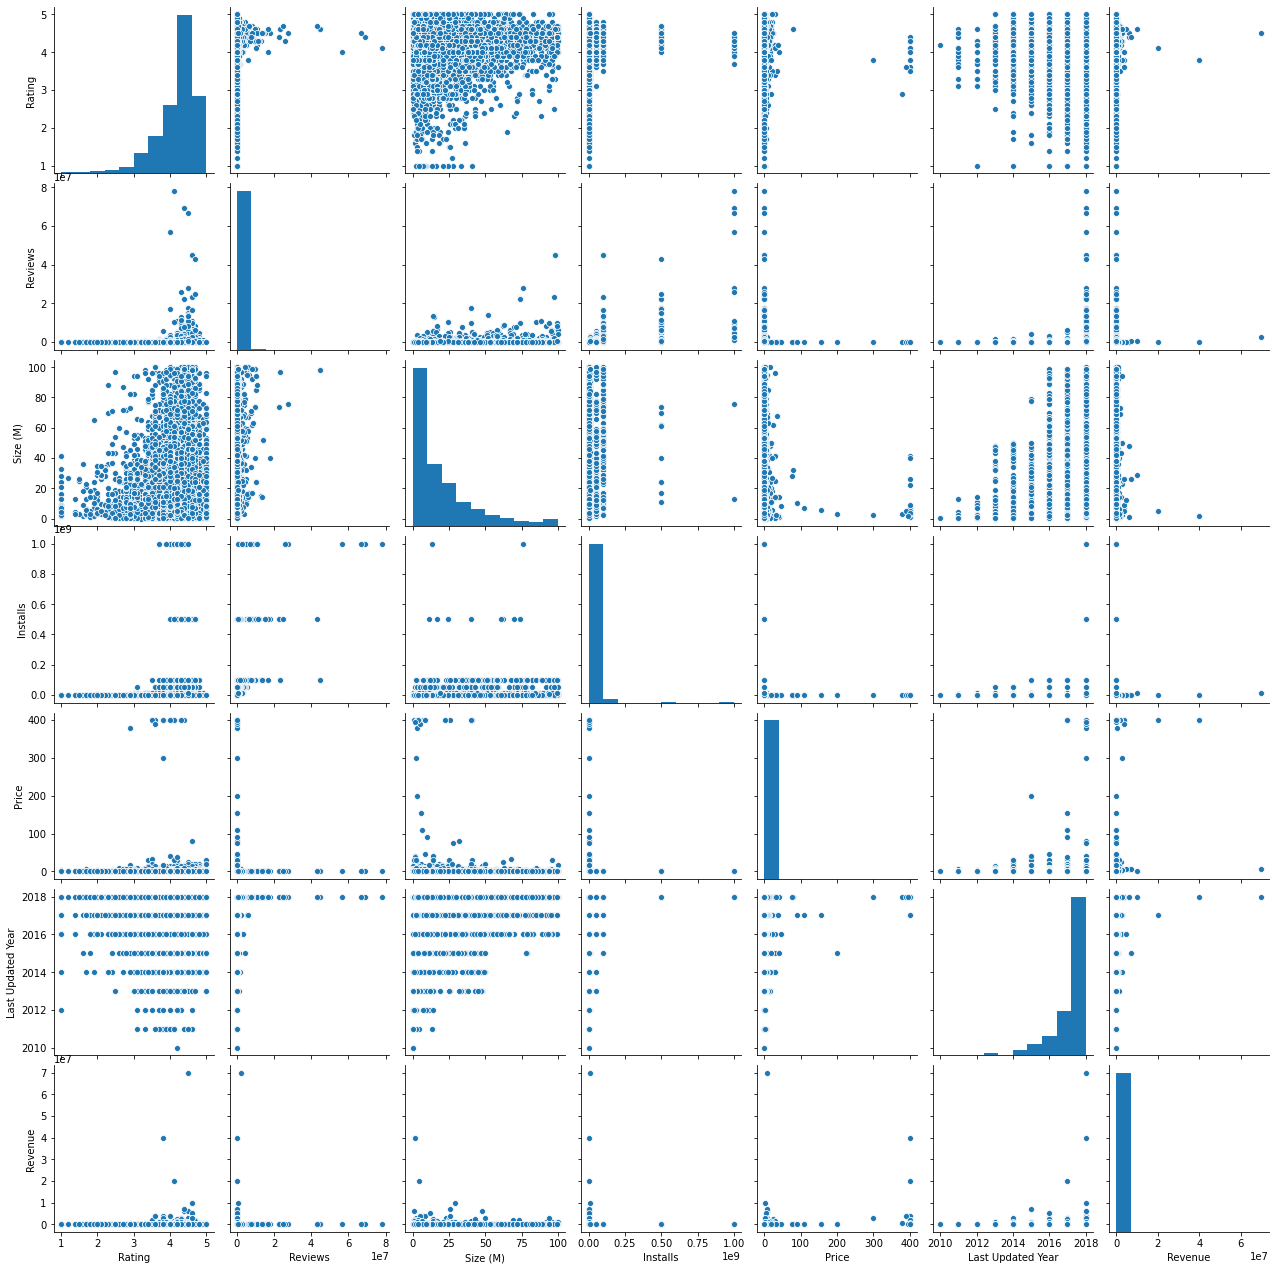

In [142]:
sns.pairplot(df)
plt.show()

### How many percent of applications are free and how many are paid?

In [143]:
df1 = df['Type'].value_counts()
df1

Free    9017
Paid     758
Name: Type, dtype: int64

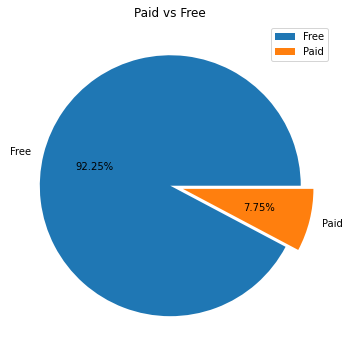

In [144]:
fig, ax = plt.subplots(figsize = (6,6))
ax.pie(df1, explode = (0, 0.1), labels = df1.index, autopct='%1.2f%%')
plt.title('Paid vs Free')
plt.legend()
plt.show()

### Total Number of applications in each categories

In [145]:
df2 = df['Category'].value_counts()
df2.head()

FAMILY      1910
GAME         963
TOOLS        830
BUSINESS     421
MEDICAL      400
Name: Category, dtype: int64

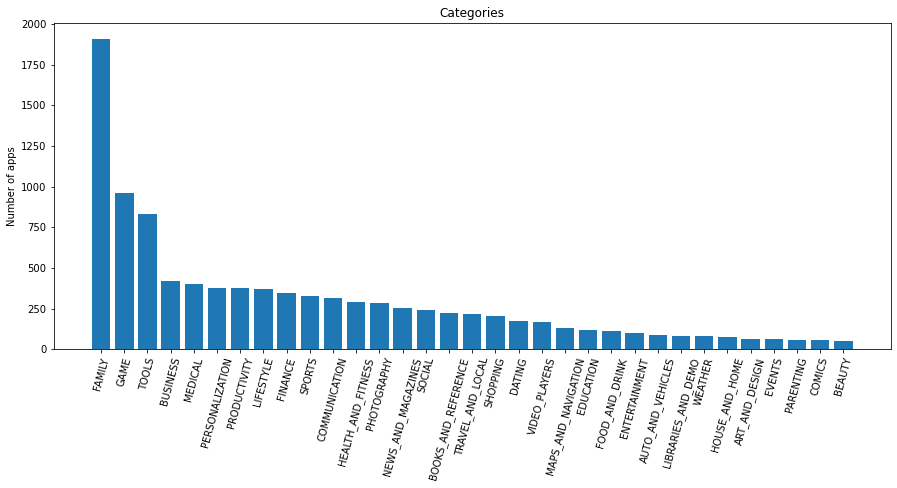

In [146]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(df2.index, df2)
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.index, rotation=75)
plt.ylabel('Number of apps')
plt.title('Categories')
plt.show()

### Total revenue through years

In [147]:
df3 = df.groupby('Last Updated Year').agg(total_revenue = ('Revenue', 'sum'))
df3.head()

,total_revenue
Last Updated Year,
2010.0,0.00
2011.0,6989.00
2012.0,30167.40
2013.0,1771570.85
2014.0,8418164.54


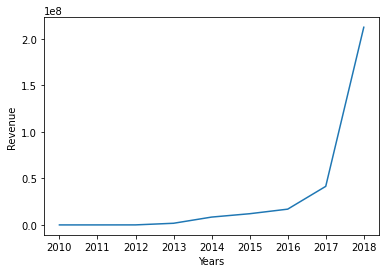

In [148]:
plt.plot(df3.index, df3['total_revenue'])
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()

### Total revenue for each year per content rating

In [149]:
df4 = df.groupby(['Last Updated Year', 'Content Rating']).agg(total_revenue = ('Revenue', 'sum')).reset_index()
df4.tail()

,Last Updated Year,Content Rating,total_revenue
26,2018.0,Adults only 18+,0.0
27,2018.0,Everyone,122191624.3
28,2018.0,Everyone 10+,74520880.0
29,2018.0,Mature 17+,10249647.9
30,2018.0,Teen,5524207.7


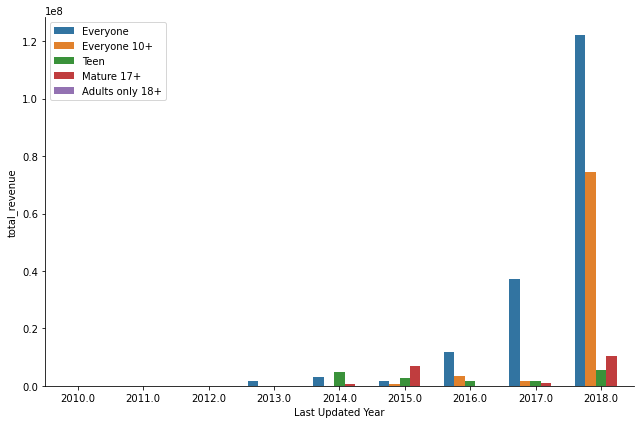

In [150]:
sns.catplot("Last Updated Year", "total_revenue", "Content Rating",
                   data=df4, kind="bar", height = 6, aspect = 1.5, legend=False)
plt.legend(loc = 'upper left')
plt.show()

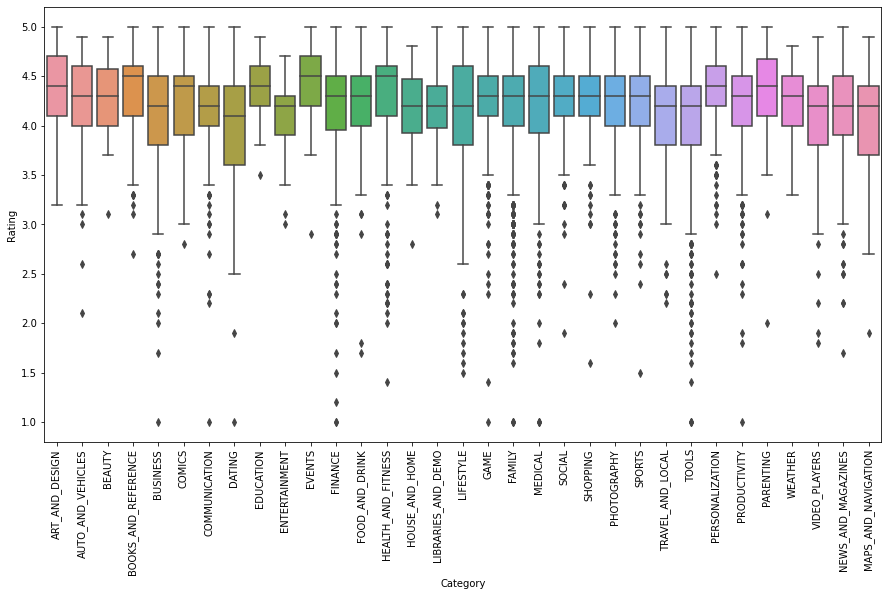

In [151]:
plt.subplots(figsize = (15, 8))
sns.boxplot(x = 'Category', y = 'Rating', data = df)
plt.xticks(rotation = 90)
plt.show()

# Prediction for App Rating

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [153]:
df = df[~df['Rating'].isna()]

In [154]:
X = df[['Category', 'Reviews', 'Installs', 'Size (M)', 'Type', 'Price', 'Content Rating']]
y = df[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
numeric_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one', OneHotEncoder())
])

column_preprocessing = ColumnTransformer(transformers = [
    ('numeric', numeric_transformer, ['Reviews', 'Installs', 'Size (M)', 'Price']),
    ('categorical', categorical_transformer, ['Category', 'Type', 'Content Rating'])
])

model = Pipeline(steps = [
    ('preprocessing', column_preprocessing),
    ('classifier', KNeighborsRegressor(n_neighbors = 5))
])

model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

0.32086814244465833